Импортируем необходимые библиотеки

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from sklearn.model_selection import train_test_split

# EDA
---



In [3]:
data = pd.read_csv('combined_data.csv', delimiter=',', encoding='utf-8')
data.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,AAG,developer,https://spb.cian.ru/sale/flat/298322124/,Санкт-Петербург,sale,flat,3,9,1,42.55,...,-1.0,Без отделки,"21,6 м²","6,1 м²",7.812213e+10,Красногвардейский,Помяловского,NaN,Новочеркасская,Akzent
1,Century 21 Гарант,real_estate_agent,https://spb.cian.ru/sale/flat/299745177/,Санкт-Петербург,sale,flat,3,17,1,45.00,...,-1.0,-1,18 м²,"13,5 м²",7.911724e+10,Красносельский,Петергофское шоссе,53,Автово,NaN
2,LEGENDA Intelligent Development,developer,https://spb.cian.ru/sale/flat/299451096/,Санкт-Петербург,sale,flat,6,23,1,66.50,...,-1.0,Без отделки,"58,5 м²",-1,7.812213e+10,Выборгский,аллея Академика Лихачева,7,Площадь Мужества,"Институтский, 16"
3,Century 21 Гарант,real_estate_agent,https://spb.cian.ru/sale/flat/296734435/,Санкт-Петербург,sale,flat,11,14,1,36.00,...,-1.0,-1,"17,7 м²","8,4 м²",7.911003e+10,Приморский,Приморский проспект,145К3,Беговая,NaN
4,RBI,developer,https://spb.cian.ru/sale/flat/299131842/,Санкт-Петербург,sale,flat,14,14,1,39.30,...,-1.0,"Предчистовая, чистовая","11,1 м²","15,4 м²",7.812213e+10,Фрунзенский,Волковское,NaN,Волковская,Аэронавт ЖК


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                3991 non-null   object 
 1   author_type           3991 non-null   object 
 2   url                   4120 non-null   object 
 3   location              4120 non-null   object 
 4   deal_type             4120 non-null   object 
 5   accommodation_type    4120 non-null   object 
 6   floor                 4120 non-null   int64  
 7   floors_count          4120 non-null   int64  
 8   rooms_count           4120 non-null   int64  
 9   total_meters          4120 non-null   float64
 10  price                 4120 non-null   int64  
 11  year_of_construction  2667 non-null   object 
 12  object_type           2667 non-null   float64
 13  house_material_type   2667 non-null   object 
 14  heating_type          2667 non-null   float64
 15  finish_type          

In [5]:
data.describe()

,floor,floors_count,rooms_count,total_meters,price,object_type,heating_type,phone
count,4120.000000,4120.000000,4120.000000,4120.000000,4.120000e+03,2667.0,2667.0,2.667000e+03
mean,5.794903,11.994660,1.794417,63.911915,2.204743e+07,-1.0,-1.0,7.873458e+10
std,4.974655,6.594779,1.601383,58.891337,4.453732e+07,0.0,0.0,7.309055e+08
min,1.000000,2.000000,-1.000000,10.000000,3.000000e+05,-1.0,-1.0,7.800512e+10
25%,2.000000,7.000000,1.000000,25.900000,5.934050e+06,-1.0,-1.0,7.812213e+10
50%,4.000000,11.000000,1.000000,38.900000,9.397475e+06,-1.0,-1.0,7.812213e+10
75%,8.000000,16.000000,3.000000,81.025000,1.951856e+07,-1.0,-1.0,7.968187e+10
max,32.000000,80.000000,5.000000,443.000000,4.000000e+08,-1.0,-1.0,7.981997e+10


## Подготавливаем датасет

---



In [6]:
df_no_duplicates = data.drop_duplicates()

In [ ]:
import sqlite3

conn = sqlite3.connect('flats.db')
df_no_duplicates.to_sql('flats_from_parse', conn, index = False)
conn.close()

In [ ]:
# Подключение к базе данных SQLite
conn = sqlite3.connect('flats.db')
cursor = conn.cursor()

# Выполнение SELECT запроса
cursor.execute("SELECT * FROM flats_from_parse")

# Получение результатов запроса
rows = cursor.fetchall()

# Вывод результатов
print(rows)

# Закрытие соединения с базой данных
conn.close()

[('AAG', 'developer', 'https://spb.cian.ru/sale/flat/298322124/', 'Санкт-Петербург', 'sale', 'flat', 3, 9, 1, 42.55, 15501384, '2024', -1.0, 'Кирпичный', -1.0, 'Без отделки', '21,6\xa0м²', '6,1\xa0м²', 78122133814.0, 'Красногвардейский', ' Помяловского', None, 'Новочеркасская', 'Akzent'), ('Century 21 Гарант', 'real_estate_agent', 'https://spb.cian.ru/sale/flat/299745177/', 'Санкт-Петербург', 'sale', 'flat', 3, 17, 1, 45.0, 9299000, '-1', -1.0, '-1', -1.0, '-1', '18\xa0м²', '13,5\xa0м²', 79117238667.0, 'Красносельский', 'Петергофское шоссе', '53', 'Автово', None), ('LEGENDA Intelligent Development', 'developer', 'https://spb.cian.ru/sale/flat/299451096/', 'Санкт-Петербург', 'sale', 'flat', 6, 23, 1, 66.5, 21147000, '2021', -1.0, 'Монолитный', -1.0, 'Без отделки', '58,5\xa0м²', '-1', 78122133948.0, 'Выборгский', 'аллея Академика Лихачева', '7', 'Площадь Мужества', 'Институтский, 16'), ('Century 21 Гарант', 'real_estate_agent', 'https://spb.cian.ru/sale/flat/296734435/', 'Санкт-Петербург

In [7]:
df_no_duplicates.dtypes

author                   object
author_type              object
url                      object
location                 object
deal_type                object
accommodation_type       object
floor                     int64
floors_count              int64
rooms_count               int64
total_meters            float64
price                     int64
year_of_construction     object
object_type             float64
house_material_type      object
heating_type            float64
finish_type              object
living_meters            object
kitchen_meters           object
phone                   float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object

In [8]:
# Обрезаем ненужные символы в характеристиках с м^2
def to_correct_type(col):
    """
    Функция избавляется от лишних слов оставляя только метры
    in: col with words -> str
    out: just number -> str
    """
    if not isinstance(col, (int, float)):
        col = col.replace('\xa0', ' ')  # Замена неразрывного пробела на обычный пробел
        col = col.split(' ')[0].replace(',', '.')  # Преобразование строки в число
    return col

In [9]:
# Применяем функцию к полям
df_no_duplicates['kitchen_meters'] = df_no_duplicates['kitchen_meters'].apply(to_correct_type)
df_no_duplicates['kitchen_meters'] = df_no_duplicates['kitchen_meters'].astype(float)

df_no_duplicates['living_meters'] = df_no_duplicates['living_meters'].apply(to_correct_type)
df_no_duplicates['living_meters'] = df_no_duplicates['living_meters'].astype(float)

C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\2426270015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['kitchen_meters'] = df_no_duplicates['kitchen_meters'].apply(to_correct_type)
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\2426270015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['kitchen_meters'] = df_no_duplicates['kitchen_meters'].astype(float)
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\2426270015.py:5: SettingWithCopyWarning: 
A value is trying t

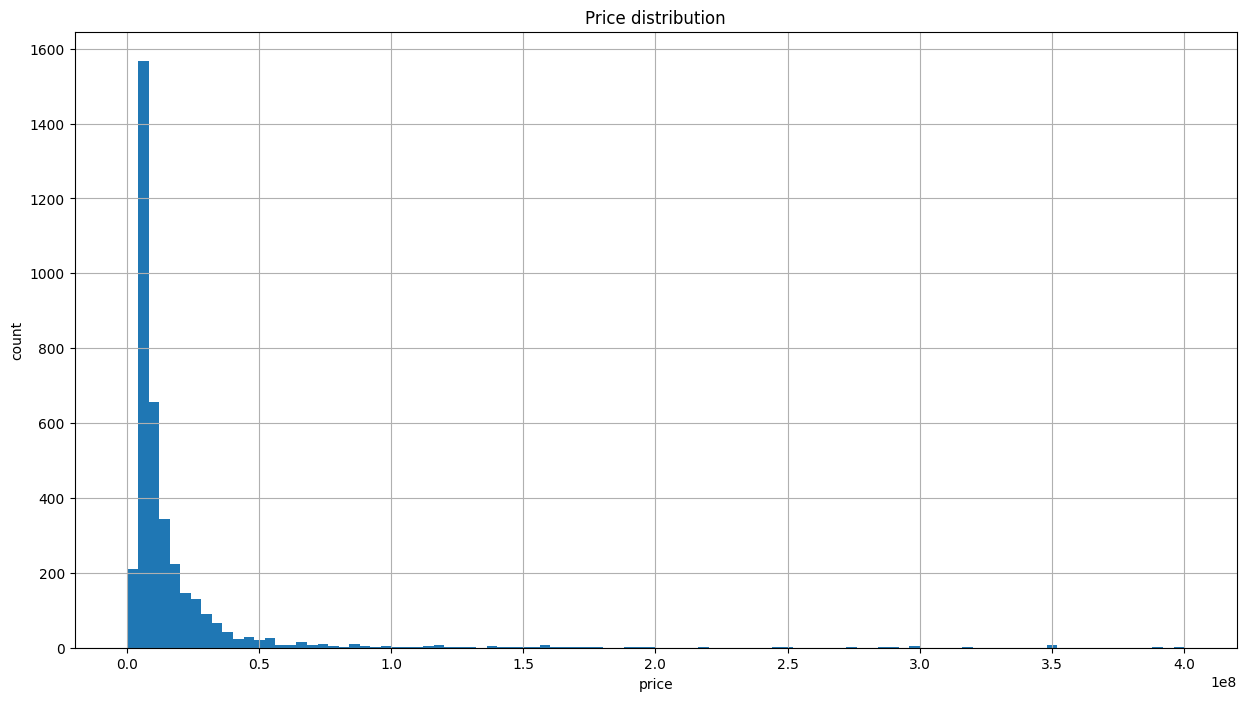

In [10]:
# Посмотрим на распределение зависимой переменной
plt.figure(figsize = (15, 8))

df_no_duplicates['price'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('price')

plt.title('Price distribution')
plt.show()

In [11]:
df_no_duplicates['log_price'] = np.log(df_no_duplicates['price'])

C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3100827338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['log_price'] = np.log(df_no_duplicates['price'])


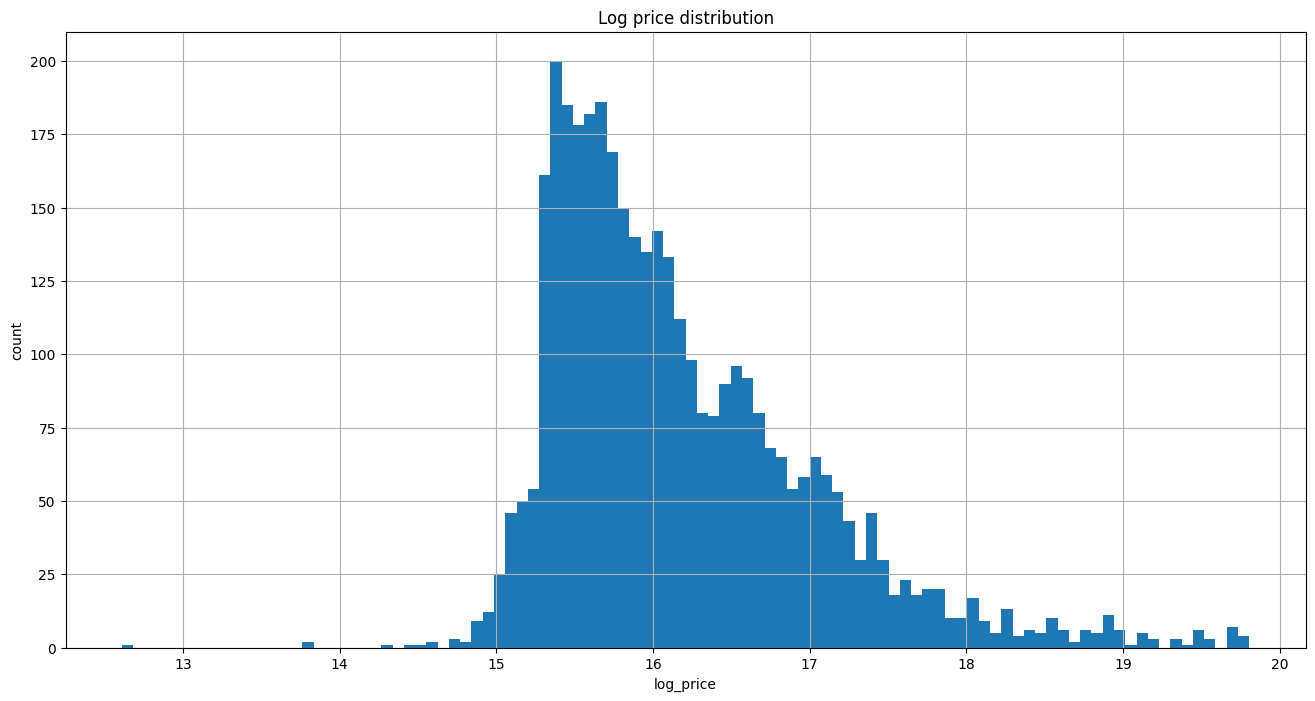

In [12]:
plt.figure(figsize = (16, 8))

df_no_duplicates['log_price'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('log_price')

plt.title('Log price distribution')
plt.show()

In [13]:
df_no_duplicates = df_no_duplicates.drop(columns=['author', 'url', 'object_type', 'heating_type', 'deal_type', 'location', 'accommodation_type', 'phone', 'house_number', 'residential_complex'])

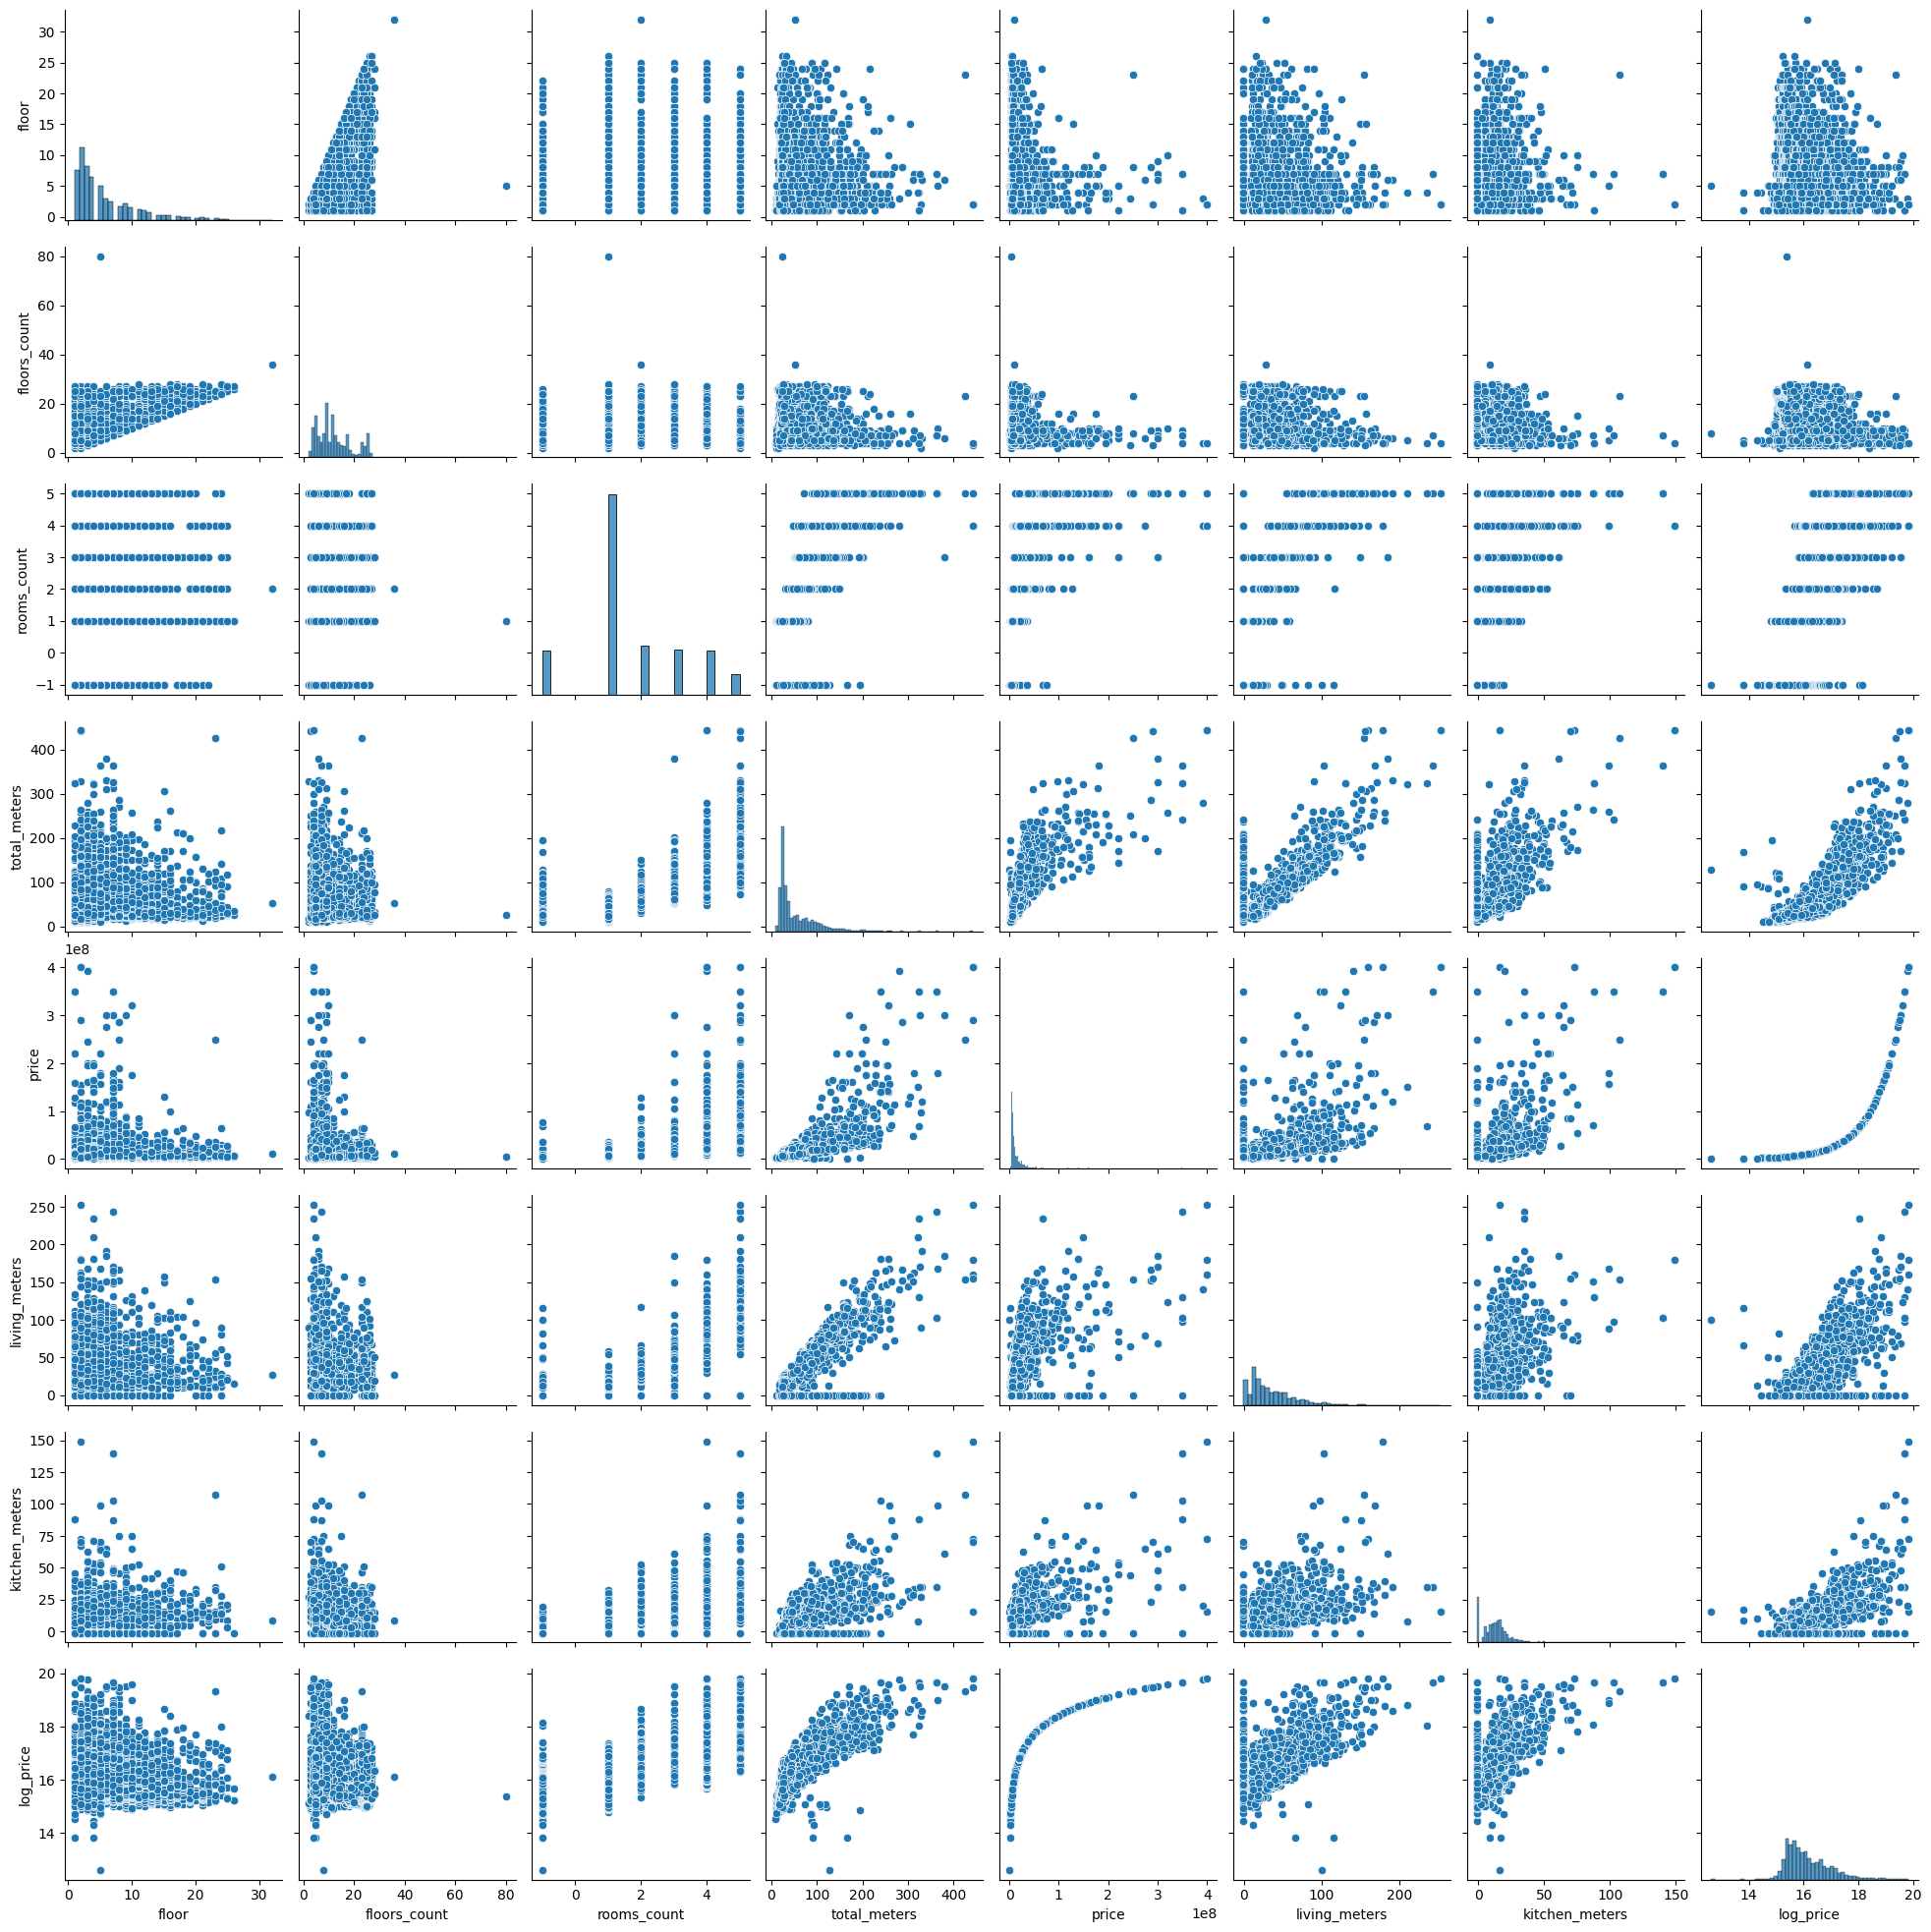

In [14]:
# Подготовка числовых фич
numeric_data = df_no_duplicates.select_dtypes(include=['float64', 'int64'])

# Построение матрицы диаграмм рассеяния и гистограмм
sns.pairplot(numeric_data)
plt.show()

In [15]:
# Удаляем выбросы
df_no_duplicates = df_no_duplicates[df_no_duplicates.price.between(df_no_duplicates.price.quantile(0.05), df_no_duplicates.price.quantile(0.95))]
df_no_duplicates = df_no_duplicates[df_no_duplicates.total_meters.between(df_no_duplicates.total_meters.quantile(0.01), df_no_duplicates.total_meters.quantile(0.99))]

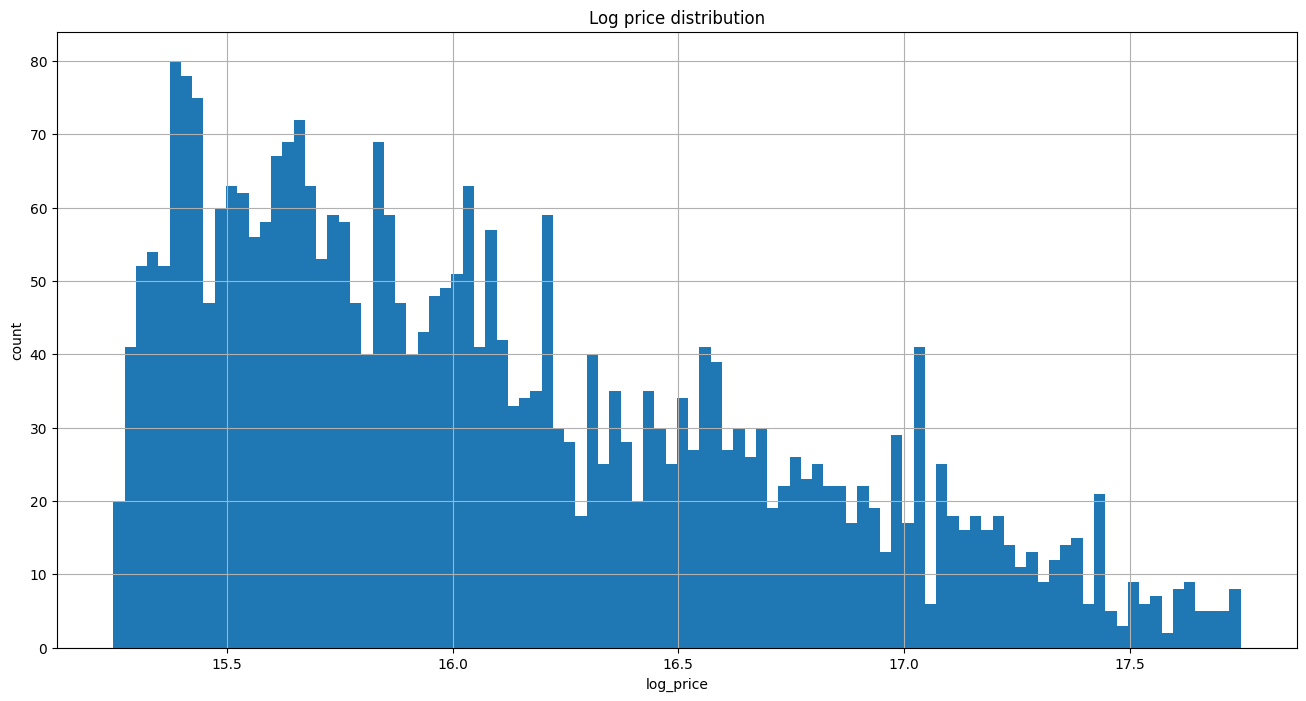

In [16]:
plt.figure(figsize = (16, 8))

df_no_duplicates['log_price'].hist(bins=100)
plt.ylabel('count')
plt.xlabel('log_price')

plt.title('Log price distribution')
plt.show()

# Первая модель (default)

---
В качестве алгоритма буду использовать готовое решение библиотеки catboost "CatBoostRegressor", функция потерь: RMSE, оценка качества: R^2

In [17]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
cat_features = df_no_duplicates.select_dtypes(include=['object']).columns.tolist()
X = df_no_duplicates.drop(columns=['price', 'log_price'], axis=1)
y = df_no_duplicates['log_price']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=12)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)

# Заполнение пропущенных значений для категориальных признаков
X_train[cat_features] = X_train[cat_features].fillna('NaN')
X_validation[cat_features] = X_validation[cat_features].fillna('NaN')
X_test[cat_features] = X_test[cat_features].fillna('NaN')

# Создание и обучение модели CatBoost с указанием категориальных признаков
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=cat_features)
model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)

# Оценка качества модели на тестовой выборке
predictions = model.predict(X_test)

# Посчитаем ошибку
r2tr = model.score(X_train, y_train)
r2val = model.score(X_validation, y_validation)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2val:.2} validation')
print(f'R^2 = {r2te:.2} test')


0:	learn: 0.5656256	test: 0.5610231	best: 0.5610231 (0)	total: 189ms	remaining: 3m 9s
1:	learn: 0.5327825	test: 0.5271395	best: 0.5271395 (1)	total: 216ms	remaining: 1m 47s
2:	learn: 0.4999637	test: 0.4939580	best: 0.4939580 (2)	total: 242ms	remaining: 1m 20s
3:	learn: 0.4724964	test: 0.4674503	best: 0.4674503 (3)	total: 268ms	remaining: 1m 6s
4:	learn: 0.4462780	test: 0.4414586	best: 0.4414586 (4)	total: 293ms	remaining: 58.3s
5:	learn: 0.4226420	test: 0.4183924	best: 0.4183924 (5)	total: 315ms	remaining: 52.2s
6:	learn: 0.4023600	test: 0.3986060	best: 0.3986060 (6)	total: 339ms	remaining: 48.1s
7:	learn: 0.3838464	test: 0.3813469	best: 0.3813469 (7)	total: 362ms	remaining: 44.8s
8:	learn: 0.3676168	test: 0.3667070	best: 0.3667070 (8)	total: 387ms	remaining: 42.6s
9:	learn: 0.3523784	test: 0.3530896	best: 0.3530896 (9)	total: 420ms	remaining: 41.5s
10:	learn: 0.3391510	test: 0.3408002	best: 0.3408002 (10)	total: 445ms	remaining: 40s
11:	learn: 0.3266948	test: 0.3294395	best: 0.3294395

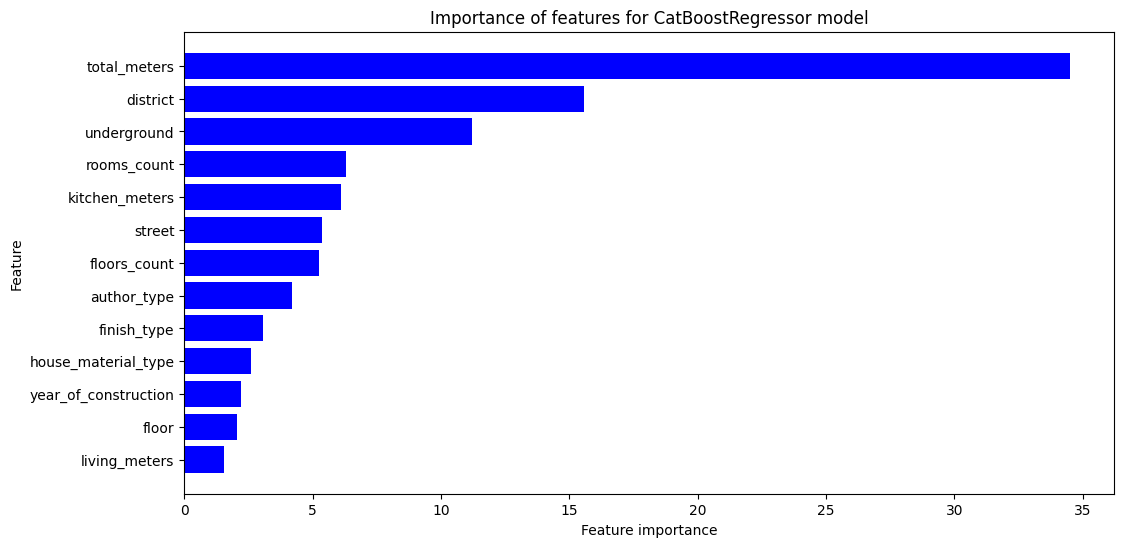

In [18]:
feature_importance = model.get_feature_importance()
# Сортируем индексы признаков по убыванию важности
sorted_indices = np.argsort(feature_importance)

# Создаем гистограмму с отсортированными признаками
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], color='b', align='center')
plt.yticks(range(len(feature_importance)), np.array(model.feature_names_)[sorted_indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Importance of features for CatBoostRegressor model')
plt.show()

In [19]:
# Тест предикта
pr = model.predict(['homeowner', 7, 16, 2, 58, '2024', 'Монолитный', '-1', None, None, 'Московский', 'Среднерогатская', 'Звездная'])
np.exp(pr)

11349753.464782815

Зафиксирую результаты полученные с минимальной обработкой датасета для 1 модели

In [20]:
# Посчитаем ошибку
r2tr = model.score(X_train, y_train)
r2val = model.score(X_validation, y_validation)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2val:.2} validation')
print(f'R^2 = {r2te:.2} test')

R^2 = 0.97 train
R^2 = 0.92 validation
R^2 = 0.92 test


# Feature engineering

---



Заполню пропуски в типе постройки дома

In [21]:
def categorie_material_type(col):
  """
  Функция разделяет материал постройки дома на категории
  in: col with house_material_type -> str
  out: house_material_type category -> str
  """
  if pd.isnull(col) or col == '-1':
        return 'Неизвестно'
  elif col.startswith('Монолитно-кирпичный'):
    return 'Монолитно-кирпичный'
  elif col.startswith('Панельный'):
    return 'Панельный'
  else:
    return col

In [22]:
df_no_duplicates['house_material_type'] = df_no_duplicates['house_material_type'].apply(categorie_material_type)

In [23]:
df_no_duplicates['house_material_type'].value_counts()

house_material_type
Неизвестно             2334
Монолитно-кирпичный     604
Монолитный              303
Панельный                39
Кирпичный                 5
Name: count, dtype: int64

Заполню пропуски в авторе публикации на риэлтора

In [24]:
df_no_duplicates['author_type'] = df_no_duplicates['author_type'].fillna('realtor')

In [25]:
df_no_duplicates['author_type'].value_counts()

author_type
developer                   1685
real_estate_agent            979
representative_developer     294
realtor                      232
homeowner                     66
unknown                       29
Name: count, dtype: int64

Обработаю finish_type

In [26]:
df_no_duplicates['finish_type'] = df_no_duplicates['finish_type'].replace('-', '-1')
df_no_duplicates['finish_type'] = df_no_duplicates['finish_type'].replace('-1', 'Неизвестно')
df_no_duplicates['finish_type'] = df_no_duplicates['finish_type'].fillna('Неизвестно')

In [29]:
def categorize_finish_type(col):
  """
  Функция разделяет тип отделки на категории
  in: col with finish_type -> str
  out: finish_type category -> str
  """
  if col.startswith('Чистовая'):
    return 'Чистовая'
  elif col.startswith('Без отделки'):
    return 'Без отделки'
  elif col.startswith('Предчистовая'):
    return 'Предчистовая'
  elif col.startswith('Черновая'):
    return 'Черновая'
  else:
    return col

In [30]:
df_no_duplicates['finish_type'] = df_no_duplicates['finish_type'].apply(categorize_finish_type)

Попробую засунуть кастомную фичу с рейтингом района

In [31]:
df_no_duplicates['district'].value_counts()

district
Приморский           487
Московский           334
Пушкинский           305
Выборгский           280
Невский              273
Василеостровский     236
Красногвардейский    214
Петроградский        202
Красносельский       169
Центральный          146
Адмиралтейский       129
Курортный            123
Калининский          113
Колпинский            95
Фрунзенский           90
Петродворцовый        52
Кировский             37
Name: count, dtype: int64

In [33]:
def rating_score(col):
  if col == 'Московский':
    return 17
  elif col == 'Выборгский':
    return 16
  elif col == 'Приморский':
    return 15
  elif col == 'Калининский':
    return 14
  elif col == 'Василеостровский':
    return 13
  elif col == 'Петроградский':
    return 12
  elif col == 'Фрунзенский':
    return 11
  elif col == 'Красносельский':
    return 10
  elif col == 'Петродворцовый':
    return 9
  elif col == 'Курортный':
    return 8
  elif col == 'Невский':
    return 7
  elif col == 'Центральный':
    return 6
  elif col == 'Пушкинский':
    return 5
  elif col == 'Адмиралтейский':
    return 4
  elif col == 'Красногвардейский':
    return 3
  elif col == 'Кировский':
    return 2
  elif col == 'Колпинский':
    return 1

In [34]:
df_no_duplicates['district_rating'] = df_no_duplicates['district'].apply(rating_score)

In [35]:
dt = df_no_duplicates.copy()

In [36]:
dt.head()

,author_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,house_material_type,finish_type,living_meters,kitchen_meters,district,street,underground,log_price,district_rating
0,developer,3,9,1,42.55,15501384,2024,Кирпичный,Без отделки,21.6,6.1,Красногвардейский,Помяловского,Новочеркасская,16.556440,3
1,real_estate_agent,3,17,1,45.00,9299000,-1,Неизвестно,Неизвестно,18.0,13.5,Красносельский,Петергофское шоссе,Автово,16.045417,10
2,developer,6,23,1,66.50,21147000,2021,Монолитный,Без отделки,58.5,-1.0,Выборгский,аллея Академика Лихачева,Площадь Мужества,16.867009,16
3,real_estate_agent,11,14,1,36.00,8888888,-1,Неизвестно,Неизвестно,17.7,8.4,Приморский,Приморский проспект,Беговая,16.000313,15
4,developer,14,14,1,39.30,15275737,2026,Монолитно-кирпичный,Предчистовая,11.1,15.4,Фрунзенский,Волковское,Волковская,16.541776,11


In [37]:
# Меняем кол-во комнат на 0 (студия) где не проставлены жилые метры и кол-во комнат = -1
dt.loc[(dt['rooms_count'] == -1) & (dt['living_meters'].isnull()), 'rooms_count'] = 0

In [38]:
# Меняем кол-во комнат на 0 (студия) где не проставлены кухонные метры и кол-во комнат = -1
dt.loc[(dt['rooms_count'] == -1) & (dt['kitchen_meters'] == -1), 'rooms_count'] = 0

In [39]:
# Меняем кол-во комнат на 0 (студия) где проставлены жилые метры и кухонные как -1
dt.loc[(dt['rooms_count'] == -1) & (dt['living_meters'] == -1) & (dt['kitchen_meters'] == -1), 'rooms_count'] = 0

In [40]:
# Меняем кол-во комнат на 0 (студия) где проставлены жилые метры и кухонные, но кол-во комнат = -1
dt.loc[(dt['rooms_count'] == -1) & (dt['living_meters'] != -1) & (dt['kitchen_meters'] != -1), 'rooms_count'] = 0

In [41]:
# Меняем кол-во комнат на 0 (студия) оставшиеся
dt.loc[(dt['rooms_count'] == -1), 'rooms_count'] = 0

In [42]:
# Меняем на 0 (студия) ошибочно попавшие в однушки студии
dt.loc[(dt['rooms_count'] == 1) & ((dt['living_meters'] == -1) & (dt['kitchen_meters'] == -1)), 'rooms_count'] = 0

In [43]:
# Меняем на 0 (студия) ошибочно попавшие в однушки студии step 2
dt.loc[(dt['rooms_count'] == 1) & (dt['living_meters'] == -1), 'rooms_count'] = 0

In [44]:
# Меняем на 0 (студия) ошибочно попавшие в однушки студии step 3
dt.loc[(dt['rooms_count'] == 1) & (dt['kitchen_meters'] == -1) & (dt['total_meters'] < 36), 'rooms_count'] = 0

In [45]:
# Меняем на 0 (студия) ошибочно попавшие в однушки студии step 4
dt.loc[(dt['rooms_count'] == 1) & (dt['kitchen_meters'].isnull()) & (dt['total_meters'] < 36), 'rooms_count'] = 0

Попробую подправить значения для living_meters и kitchen_meters где каким-то образом не проставились значения, опираясь на статистику по медиане S kitchen = 15 % от total_area, а S living = 65 % от total_area **для студий**

In [46]:
condition = (dt['rooms_count'] == 0) & ((dt['living_meters'] == -1) & (dt['kitchen_meters'] == -1) | (dt['living_meters'].isnull()) & (dt['kitchen_meters'].isnull()))
dt.loc[condition, 'kitchen_meters'] = dt.loc[condition, 'total_meters'] * 0.15
dt.loc[condition, 'living_meters'] = dt.loc[condition, 'total_meters'] * 0.65

In [47]:
condition = (dt['rooms_count'] == 0) & (dt['kitchen_meters'] == -1)
dt.loc[condition, 'kitchen_meters'] = dt.loc[condition, 'total_meters'] * 0.15

In [48]:
condition = (dt['rooms_count'] == 0) & (dt['living_meters'] == -1)
dt.loc[condition, 'living_meters'] = dt.loc[condition, 'total_meters'] * 0.65

Попробую подправить значения для living_meters и kitchen_meters где каким-то образом не проставились значения, опираясь на статистику по медиане S kitchen = 18 % от total_area, а S living = 48 % от total_area

In [49]:
condition = ((dt['living_meters'] == -1) & (dt['kitchen_meters'] == -1) | (dt['living_meters'].isnull()) & (dt['kitchen_meters'].isnull())) & (dt['rooms_count'] >= 1)
dt.loc[condition, 'kitchen_meters'] = dt.loc[condition, 'total_meters'] * 0.18
dt.loc[condition, 'living_meters'] = dt.loc[condition, 'total_meters'] * 0.48

In [50]:
condition = (dt['living_meters'] == -1)
dt.loc[condition, 'living_meters'] = dt.loc[condition, 'total_meters'] * 0.48

In [51]:
condition = (dt['kitchen_meters'] == -1)
dt.loc[condition, 'kitchen_meters'] = dt.loc[condition, 'total_meters'] * 0.18

Теперь нужно подправить год постройки и привести к интервалам

In [52]:
dt['year_of_construction'] = dt['year_of_construction'].replace('Напишите автору', '-1')
dt['year_of_construction'] = dt['year_of_construction'].replace('Позвоните автору', '-1')
dt['year_of_construction'] = dt['year_of_construction'].fillna('-1')
dt['year_of_construction'] = dt['year_of_construction'].replace('-1', '2018')

In [53]:
dt['year_of_construction'] = dt['year_of_construction'].replace('-1', '2018')

In [54]:
dt['year_of_construction'] = dt['year_of_construction'].astype(int)

In [58]:
def years_to_interval(col):
  """
  Функция разделяет год постройки на интервалы
  in: col with years -> str
  out: house category -> str
  """
  year = int(col)
  if year > 2024:
    return 'Стройка'
  elif year >= 2019:
    return 'Новостройка'
  elif year >= 2000:
    return 'Застройка 00-х и 10-х'
  elif year >= 1930:
    return 'Сталинка | Хрущевка | Брежневка'
  else:
    return 'Дома до 1930-х'


In [59]:
dt['year_of_construction'] = dt['year_of_construction'].apply(years_to_interval)

In [60]:
dt['year_of_construction'].value_counts()

year_of_construction
Застройка 00-х и 10-х              1531
Новостройка                         738
Стройка                             636
Дома до 1930-х                      201
Сталинка | Хрущевка | Брежневка     179
Name: count, dtype: int64

# Вторая модель (with feature engineering)

---



In [61]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
cat_features = dt.select_dtypes(include=['object']).columns.tolist()
X = dt.drop(columns=['price', 'log_price'], axis=1)
y = dt['log_price']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=2)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

# Заполнение пропущенных значений для категориальных признаков
X_train[cat_features] = X_train[cat_features].fillna('NaN')
X_validation[cat_features] = X_validation[cat_features].fillna('NaN')
X_test[cat_features] = X_test[cat_features].fillna('NaN')

# Создание и обучение модели CatBoost с указанием категориальных признаков
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=cat_features)
model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)

# Оценка качества модели на тестовой выборке
predictions = model.predict(X_test)

# Посчитаем ошибку
r2tr = model.score(X_train, y_train)
r2val = model.score(X_validation, y_validation)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2val:.2} validation')
print(f'R^2 = {r2te:.2} test')


0:	learn: 0.5677279	test: 0.5685586	best: 0.5685586 (0)	total: 29.5ms	remaining: 29.5s
1:	learn: 0.5361289	test: 0.5370253	best: 0.5370253 (1)	total: 59.6ms	remaining: 29.8s
2:	learn: 0.5029462	test: 0.5039099	best: 0.5039099 (2)	total: 75.2ms	remaining: 25s
3:	learn: 0.4747442	test: 0.4747464	best: 0.4747464 (3)	total: 101ms	remaining: 25s
4:	learn: 0.4476356	test: 0.4495422	best: 0.4495422 (4)	total: 138ms	remaining: 27.4s
5:	learn: 0.4219299	test: 0.4248115	best: 0.4248115 (5)	total: 166ms	remaining: 27.6s
6:	learn: 0.3990875	test: 0.4025228	best: 0.4025228 (6)	total: 197ms	remaining: 27.9s
7:	learn: 0.3848288	test: 0.3890806	best: 0.3890806 (7)	total: 206ms	remaining: 25.5s
8:	learn: 0.3679050	test: 0.3734454	best: 0.3734454 (8)	total: 229ms	remaining: 25.2s
9:	learn: 0.3517944	test: 0.3581535	best: 0.3581535 (9)	total: 255ms	remaining: 25.2s
10:	learn: 0.3374489	test: 0.3446437	best: 0.3446437 (10)	total: 278ms	remaining: 25s
11:	learn: 0.3236901	test: 0.3324837	best: 0.3324837 (1

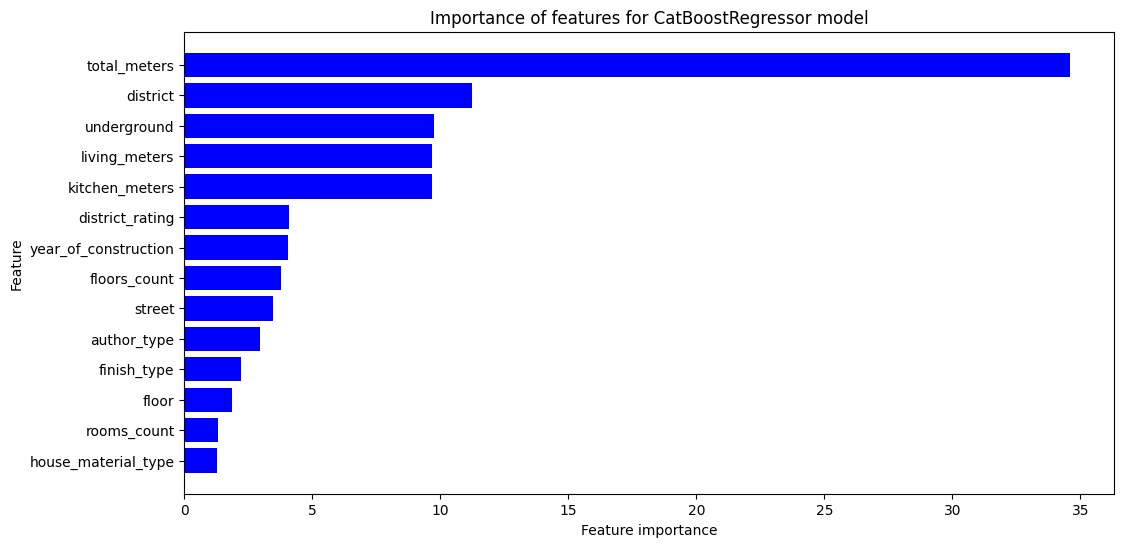

In [62]:
feature_importance = model.get_feature_importance()
# Сортируем индексы признаков по убыванию важности
sorted_indices = np.argsort(feature_importance)

# Создаем гистограмму с отсортированными признаками
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], color='b', align='center')
plt.yticks(range(len(feature_importance)), np.array(model.feature_names_)[sorted_indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Importance of features for CatBoostRegressor model')
plt.show()

Зафиксирую результаты полученные с минимальной обработкой датасета для 2 модели

In [63]:
# Посчитаем ошибку
r2tr = model.score(X_train, y_train)
r2val = model.score(X_validation, y_validation)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2val:.2} validation')
print(f'R^2 = {r2te:.2} test')

R^2 = 0.98 train
R^2 = 0.91 validation
R^2 = 0.92 test


# Третья модель (кросс-валидация)

In [64]:
dt1 = dt.copy()

In [65]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, KFold

# Разделение данных на признаки и целевую переменную
cat_features = dt1.select_dtypes(include=['object']).columns.tolist()
X = dt1.drop(columns=['price', 'log_price'], axis=1)
y = dt1['log_price']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=2)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

# Заполнение пропущенных значений для категориальных признаков
X_train[cat_features] = X_train[cat_features].fillna('NaN')
X_validation[cat_features] = X_validation[cat_features].fillna('NaN')
X_test[cat_features] = X_test[cat_features].fillna('NaN')

# Создание и обучение модели CatBoost с указанием категориальных признаков с кросс-валидацией
kf = KFold(n_splits=5, random_state=1, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_validation = X.iloc[train_index], X.iloc[val_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[val_index]

    # Заполнение пропущенных значений для категориальных признаков
    X_train[cat_features] = X_train[cat_features].fillna('NaN')
    X_validation[cat_features] = X_validation[cat_features].fillna('NaN')

    model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=cat_features, verbose=100, random_state=1)
    model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)

    # Оценка качества модели на валидационной выборке
    r2val = model.score(X_validation, y_validation)
    print(f'R^2 = {r2val:.2} validation')

# Оценка качества модели на тестовой выборке
predictions = model.predict(X_test)

# Посчитаем ошибку
r2tr = model.score(X_train, y_train)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2te:.2} test')


C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features] = X_train[cat_features].fillna('NaN')
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[cat_features] = X_validation[cat_features].fillna('NaN')


0:	learn: 0.5669636	test: 0.5597592	best: 0.5597592 (0)	total: 19.5ms	remaining: 19.5s
100:	learn: 0.1653353	test: 0.1811218	best: 0.1811218 (100)	total: 2.85s	remaining: 25.4s
200:	learn: 0.1354173	test: 0.1662436	best: 0.1662436 (200)	total: 5.26s	remaining: 20.9s
300:	learn: 0.1179019	test: 0.1597848	best: 0.1597848 (300)	total: 7.61s	remaining: 17.7s
400:	learn: 0.1055374	test: 0.1560288	best: 0.1560288 (400)	total: 9.97s	remaining: 14.9s
500:	learn: 0.0964668	test: 0.1545003	best: 0.1545003 (500)	total: 12.6s	remaining: 12.6s
600:	learn: 0.0894458	test: 0.1539457	best: 0.1538024 (571)	total: 15.1s	remaining: 9.99s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1538024392
bestIteration = 571

Shrink model to first 572 iterations.
R^2 = 0.93 validation


C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features] = X_train[cat_features].fillna('NaN')
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[cat_features] = X_validation[cat_features].fillna('NaN')


0:	learn: 0.5696225	test: 0.5453440	best: 0.5453440 (0)	total: 23.8ms	remaining: 23.8s
100:	learn: 0.1694129	test: 0.1694080	best: 0.1694080 (100)	total: 2.69s	remaining: 24s
200:	learn: 0.1379454	test: 0.1564324	best: 0.1564324 (200)	total: 5.06s	remaining: 20.1s
300:	learn: 0.1210151	test: 0.1513471	best: 0.1513233 (299)	total: 7.45s	remaining: 17.3s
400:	learn: 0.1089138	test: 0.1492736	best: 0.1492205 (394)	total: 9.89s	remaining: 14.8s
500:	learn: 0.1005405	test: 0.1484247	best: 0.1484000 (499)	total: 12.2s	remaining: 12.2s
600:	learn: 0.0931293	test: 0.1475378	best: 0.1474584 (593)	total: 14.6s	remaining: 9.68s
700:	learn: 0.0868702	test: 0.1467737	best: 0.1466921 (689)	total: 17s	remaining: 7.23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1463713151
bestIteration = 742

Shrink model to first 743 iterations.
R^2 = 0.94 validation


C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features] = X_train[cat_features].fillna('NaN')
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[cat_features] = X_validation[cat_features].fillna('NaN')


0:	learn: 0.5646742	test: 0.5655235	best: 0.5655235 (0)	total: 20.4ms	remaining: 20.4s
100:	learn: 0.1604981	test: 0.1889462	best: 0.1889462 (100)	total: 2.6s	remaining: 23.1s
200:	learn: 0.1311774	test: 0.1721665	best: 0.1721665 (200)	total: 5.07s	remaining: 20.1s
300:	learn: 0.1161893	test: 0.1681461	best: 0.1681461 (300)	total: 7.54s	remaining: 17.5s
400:	learn: 0.1052327	test: 0.1647349	best: 0.1647349 (400)	total: 9.97s	remaining: 14.9s
500:	learn: 0.0970158	test: 0.1632999	best: 0.1632878 (497)	total: 12.4s	remaining: 12.4s
600:	learn: 0.0900362	test: 0.1618473	best: 0.1618449 (599)	total: 14.9s	remaining: 9.87s
700:	learn: 0.0839346	test: 0.1610275	best: 0.1609641 (685)	total: 17.3s	remaining: 7.37s
800:	learn: 0.0789650	test: 0.1598422	best: 0.1598051 (799)	total: 19.7s	remaining: 4.88s
900:	learn: 0.0737714	test: 0.1586380	best: 0.1585960 (897)	total: 22.1s	remaining: 2.42s
999:	learn: 0.0700191	test: 0.1580802	best: 0.1580802 (999)	total: 24.4s	remaining: 0us

bestTest = 0.15

C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features] = X_train[cat_features].fillna('NaN')
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[cat_features] = X_validation[cat_features].fillna('NaN')


0:	learn: 0.5632834	test: 0.5733830	best: 0.5733830 (0)	total: 19.5ms	remaining: 19.5s
100:	learn: 0.1621395	test: 0.1802996	best: 0.1802996 (100)	total: 2.64s	remaining: 23.5s
200:	learn: 0.1345190	test: 0.1703046	best: 0.1703046 (200)	total: 5s	remaining: 19.9s
300:	learn: 0.1181798	test: 0.1655306	best: 0.1655306 (300)	total: 7.4s	remaining: 17.2s
400:	learn: 0.1071706	test: 0.1630891	best: 0.1630891 (400)	total: 9.79s	remaining: 14.6s
500:	learn: 0.0986158	test: 0.1621463	best: 0.1619287 (492)	total: 12.1s	remaining: 12.1s
600:	learn: 0.0909686	test: 0.1609218	best: 0.1608988 (590)	total: 14.5s	remaining: 9.62s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1608820097
bestIteration = 602

Shrink model to first 603 iterations.
R^2 = 0.93 validation
0:	learn: 0.5610410	test: 0.5812948	best: 0.5812948 (0)	total: 19.5ms	remaining: 19.5s


C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cat_features] = X_train[cat_features].fillna('NaN')
C:\Users\Олег\AppData\Local\Temp\ipykernel_1516\3807275887.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation[cat_features] = X_validation[cat_features].fillna('NaN')


100:	learn: 0.1601843	test: 0.1745031	best: 0.1745031 (100)	total: 2.68s	remaining: 23.9s
200:	learn: 0.1338742	test: 0.1600581	best: 0.1600581 (200)	total: 5.04s	remaining: 20s
300:	learn: 0.1182824	test: 0.1518908	best: 0.1518908 (300)	total: 7.44s	remaining: 17.3s
400:	learn: 0.1065654	test: 0.1473125	best: 0.1472386 (394)	total: 9.79s	remaining: 14.6s
500:	learn: 0.0973888	test: 0.1451693	best: 0.1451693 (500)	total: 12.2s	remaining: 12.1s
600:	learn: 0.0902672	test: 0.1437610	best: 0.1437404 (599)	total: 14.5s	remaining: 9.61s
700:	learn: 0.0837955	test: 0.1425672	best: 0.1425059 (683)	total: 16.9s	remaining: 7.2s
800:	learn: 0.0786598	test: 0.1418626	best: 0.1418053 (796)	total: 19.2s	remaining: 4.77s
900:	learn: 0.0733191	test: 0.1410102	best: 0.1410087 (899)	total: 21.6s	remaining: 2.37s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1407073187
bestIteration = 947

Shrink model to first 948 iterations.
R^2 = 0.95 validation
R^2 = 0.97 train
R^2 = 0.97 test


In [66]:
r2tr = model.score(X_train, y_train)
r2te = model.score(X_test, y_test)
print(f'R^2 = {r2tr:.2} train')
print(f'R^2 = {r2val:.2} validation')
print(f'R^2 = {r2te:.2} test')

R^2 = 0.97 train
R^2 = 0.95 validation
R^2 = 0.97 test


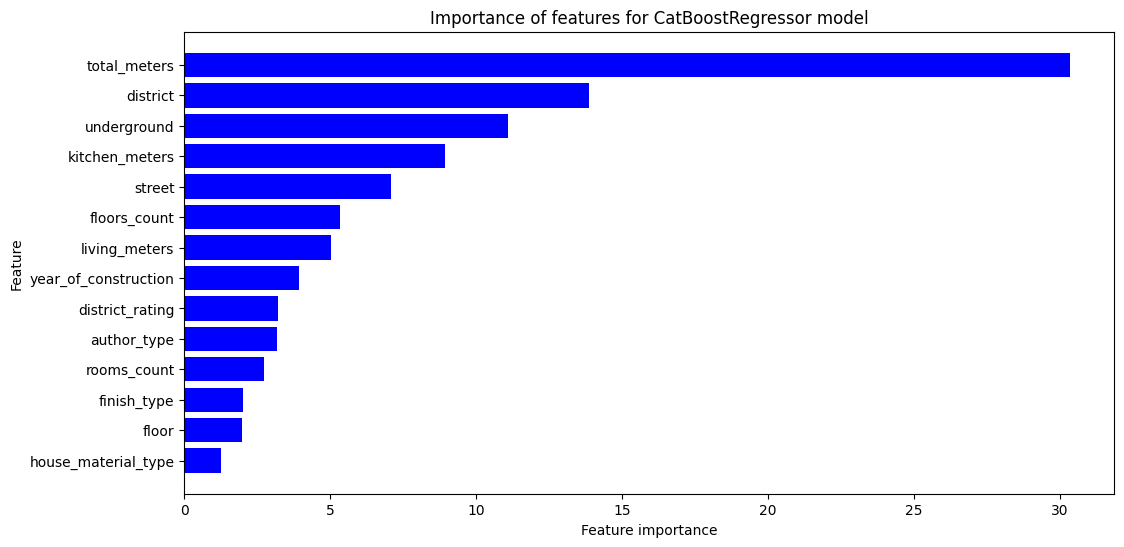

In [67]:
feature_importance = model.get_feature_importance()
# Сортируем индексы признаков по убыванию важности
sorted_indices = np.argsort(feature_importance)

# Создаем гистограмму с отсортированными признаками
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], color='b', align='center')
plt.yticks(range(len(feature_importance)), np.array(model.feature_names_)[sorted_indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Importance of features for CatBoostRegressor model')
plt.show()

# Сохранение модели

In [64]:
import pickle

with open('./model.pkl', 'wb') as model_pkl:
  pickle.dump(model, model_pkl)

# Вывод


Вторая модель с feature engineering получилась почти такая же как первая модель, хотя по логике приоритета важности фич, на мой взгляд, выглядит даже адекватнее, и на трейне на долю процента лучше первой модели, так что благодаря работе catboost под копотом грамотно подгоняет категориальные фичи, проводя feature engineereing. Третья модель с кросс-валидацией показала наилучшие результаты, в итоге оставляю ее:

1.   Первая модель

  R^2 = 0.97 train ❌

  R^2 = 0.92 validation ❌

  R^2 = 0.92 test ❌

2.   Вторая модель

  R^2 = 0.98 train ✅

  R^2 = 0.91 validation ❌

  R^2 = 0.92 test ❌


3.   Третья модель
  
  R^2 = 0.97 train ❌

  R^2 = 0.95 validation ✅

  R^2 = 0.97 test ✅






